In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
#生成模拟数据
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)),\
                    random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [7]:
def plot_centroids(centroids, weights=None, circle_color='w', \
                   cross_color='k'):
    #显示质心点
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

Text(0.5, 1.0, 'Bad - model')

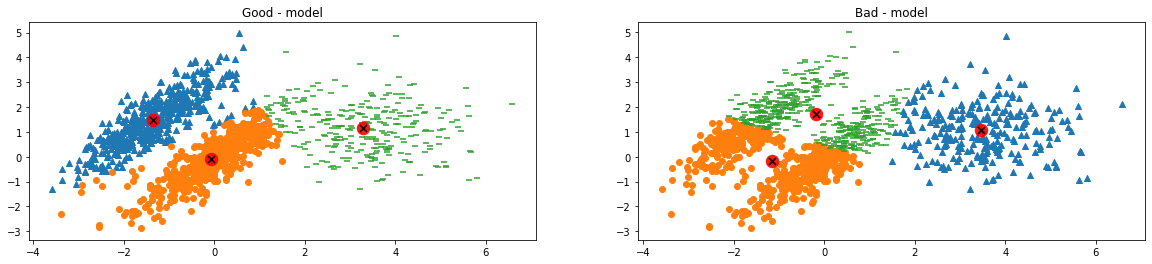

In [9]:
from sklearn.cluster import KMeans
#分别创建两个kmeans模型，第一个指定初始质心，第二个随机初始质心
k = 3
kmeans_good = KMeans(n_clusters=3,init=np.array([[-1.5,2.5]\
            ,[0.5,0],[4,0]]),n_init=1,random_state=42)
kmeans_bad = KMeans(n_clusters=3,random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)
#显示第一个聚类效果
plt.figure(figsize = (20,4))
plt.subplot(121)
mValue = ['^','o','_']
for label in range(0,k):
    XX=X[kmeans_good.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label])
plot_centroids(kmeans_good.cluster_centers_, \
               circle_color='r', cross_color='k')
plt.title('Good - model')
#显示第二个聚类效果
plt.subplot(122)
for label in range(0,k):
    XX=X[kmeans_bad.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label])
plot_centroids(kmeans_bad.cluster_centers_, \
               circle_color='r', cross_color='k')
plt.title('Bad - model')